In [90]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [91]:
library('tidyverse')

In [92]:
carData = read.csv("/content/mtcars.csv")

In [93]:
head(carData, 5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [94]:
str(carData)

'data.frame':	32 obs. of  12 variables:
 $ model: chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg  : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl  : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp : num  160 160 108 258 360 ...
 $ hp   : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt   : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec : num  16.5 17 18.6 19.4 17 ...
 $ vs   : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am   : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear : int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb : int  4 4 1 1 2 1 4 2 2 4 ...


In [95]:
colnames(carData)

[1] "model" "mpg"   "cyl"   "disp"  "hp"    "drat"  "wt"    "qsec"  "vs"   
[10] "am"    "gear"  "carb"

In [96]:
nrow(carData)

[1] 32

## Basic data management using the `tidyverse` package.

mutate() is used to add new columns or modify current ones

In [97]:
# carData %>% mutate(cyltype = 'High')
#carData %>% mutate(cyltype = ifelse(cyl > 6, 'High', 'Low'))

In [98]:
#carData %>% mutate(wtton = round(0.45*wt,2))

In [99]:
carData_new = carData %>% mutate(cyltype = ifelse(cyl > 6, 'High', 'Low'), wtton = round(0.45*wt,2))
head(carData, 5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


In [100]:
str(carData_new)

'data.frame':	32 obs. of  14 variables:
 $ model  : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg    : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl    : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp   : num  160 160 108 258 360 ...
 $ hp     : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat   : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt     : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec   : num  16.5 17 18.6 19.4 17 ...
 $ vs     : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am     : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear   : int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb   : int  4 4 1 1 2 1 4 2 2 4 ...
 $ cyltype: chr  "Low" "Low" "Low" "Low" ...
 $ wtton  : num  1.18 1.29 1.04 1.45 1.55 1.56 1.61 1.44 1.42 1.55 ...


In [101]:
### summarize()

# Returning turning the mean weight (in tons) of the cars
carData_new %>% summarise(mean_weight = mean(wtton))

mean_weight
<dbl>
1.44875


In [102]:
# Returning the mean weight (in tons) and mean displacement of the cars
carData_new %>% summarise(mean_disp = mean(disp), mean_weight = mean(wtton))

mean_disp,mean_weight
<dbl>,<dbl>
230.7219,1.44875


group_by() is used to group samples according to features.

In [103]:
# grouping cars according to cyltype and calculating mean weight and mean displacement
carData_new %>% group_by(cyltype) %>% summarise(mean(wtton), mean(disp))

cyltype,mean(wtton),mean(disp)
<chr>,<dbl>,<dbl>
High,1.800714,353.1000
Low,1.175000,135.5389


filter() is used to retain samples satisfying a specific condition.

In [104]:
# filtering cars that weight more than 2 tons
carData_new %>% filter(wtton > 2)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyltype,wtton
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4,High,2.36
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4,High,2.44
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4,High,2.41


In [105]:
# filtering cars that weight more than 2 tons and have more than 4 cylinders
carData_new %>% filter(wtton > 2 & cyl > 4)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyltype,wtton
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4,High,2.36
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4,High,2.44
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4,High,2.41


In [106]:
carData_new %>% filter(wtton > 2 | cyl > 4)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyltype,wtton
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Low,1.18
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Low,1.29
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Low,1.45
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,High,1.55
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Low,1.56
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,High,1.61
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Low,1.55
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,Low,1.55
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,High,1.83


select() is used to retain specific features

In [107]:
# selecting only the feature wtton
carData_new %>% select(wtton)

wtton
<dbl>
1.18
1.29
1.04
1.45
1.55
1.56
1.61
1.44
1.42


In [108]:
# select everything except the feature wtton
carData_new %>% select(-wtton)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyltype
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Low
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Low
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Low
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Low
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,High
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Low
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,High
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Low
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Low


In [109]:
# selecting only features cyltype and wtton
carData_new %>% select(cyltype, wtton)

cyltype,wtton
<chr>,<dbl>
Low,1.18
Low,1.29
Low,1.04
Low,1.45
High,1.55
Low,1.56
High,1.61
Low,1.44
Low,1.42


In [110]:
# selecting every other features except cyltype and wtton
carData_new %>% select(-cyltype, -wtton)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


# **ggplot()**

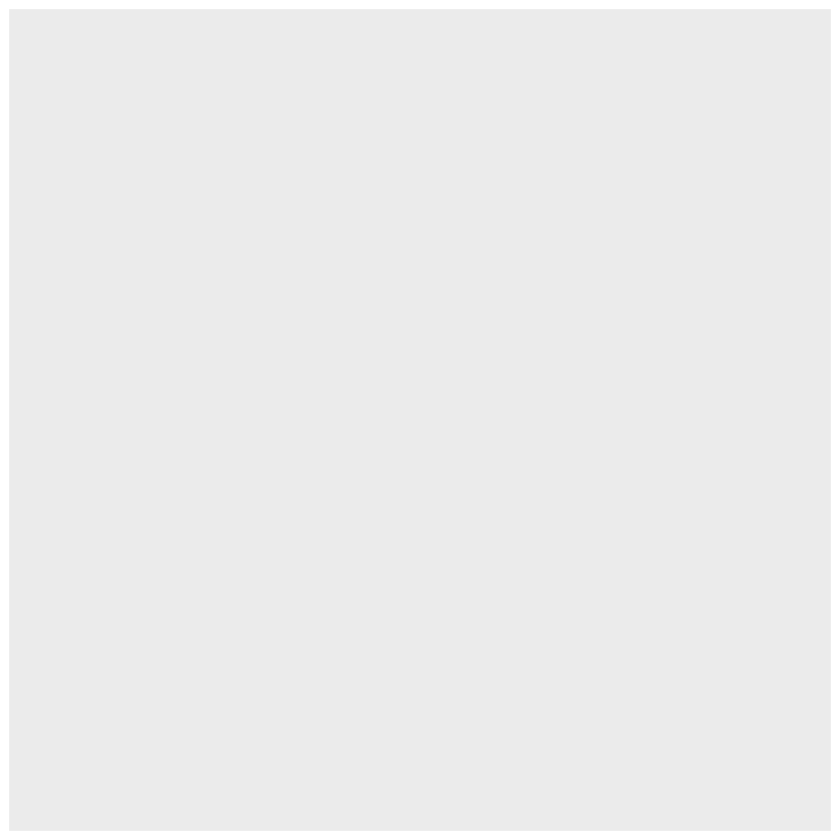

In [111]:
# Initiating the ggplot() binding to the dataframe
ggplot(data = carData)

Using the aes() to specifiy aesthetic mapping, i.e., which variables should be plotted

In [112]:
carPlot = ggplot(data = carData, aes(x = wt, y = disp))

Using the geom_ type function to add geometric elements

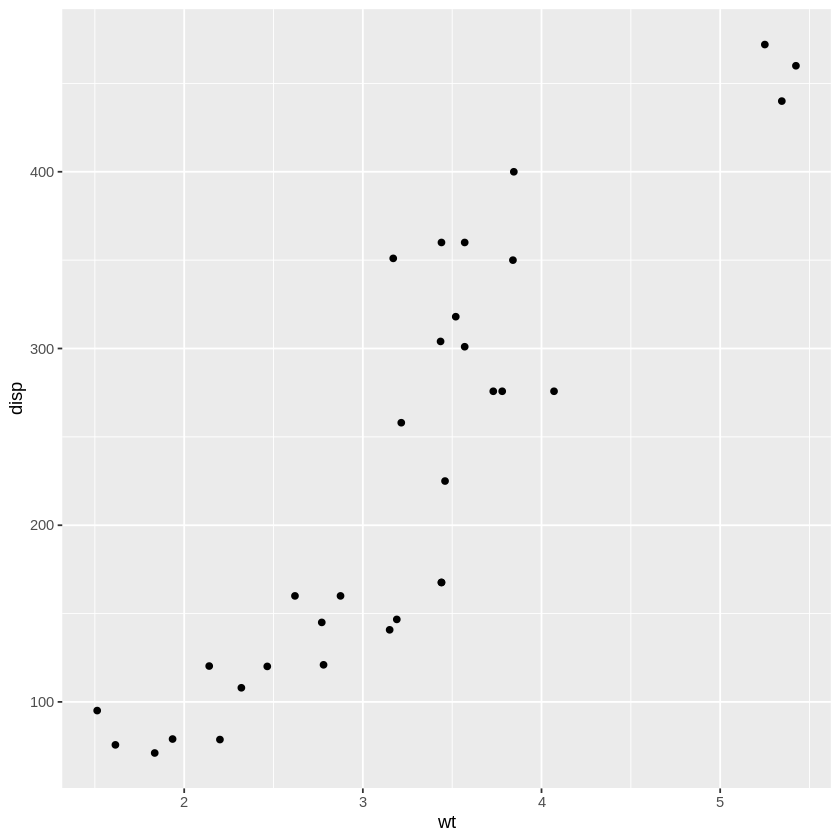

In [113]:
carPlot = carPlot + geom_point()
carPlot

In [114]:
# Adding labels
carPlot = carPlot + labs(x = 'Weight (1000 lbs)', y = 'Displacement (cu. in)')

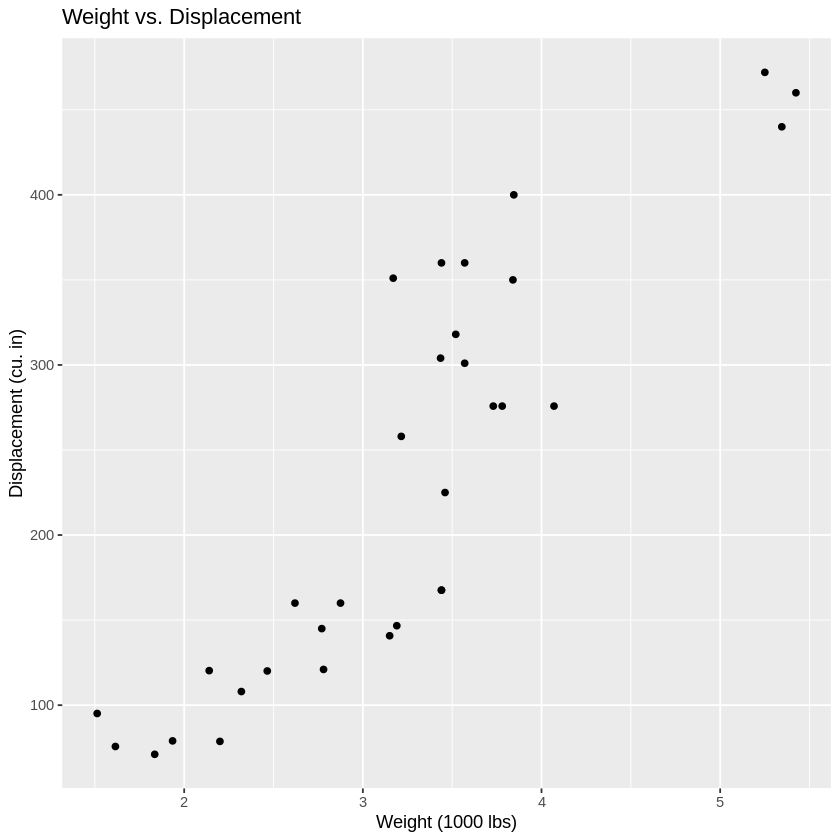

In [115]:
# Adding titles
carPlot = carPlot + labs(title = 'Weight vs. Displacement')
carPlot

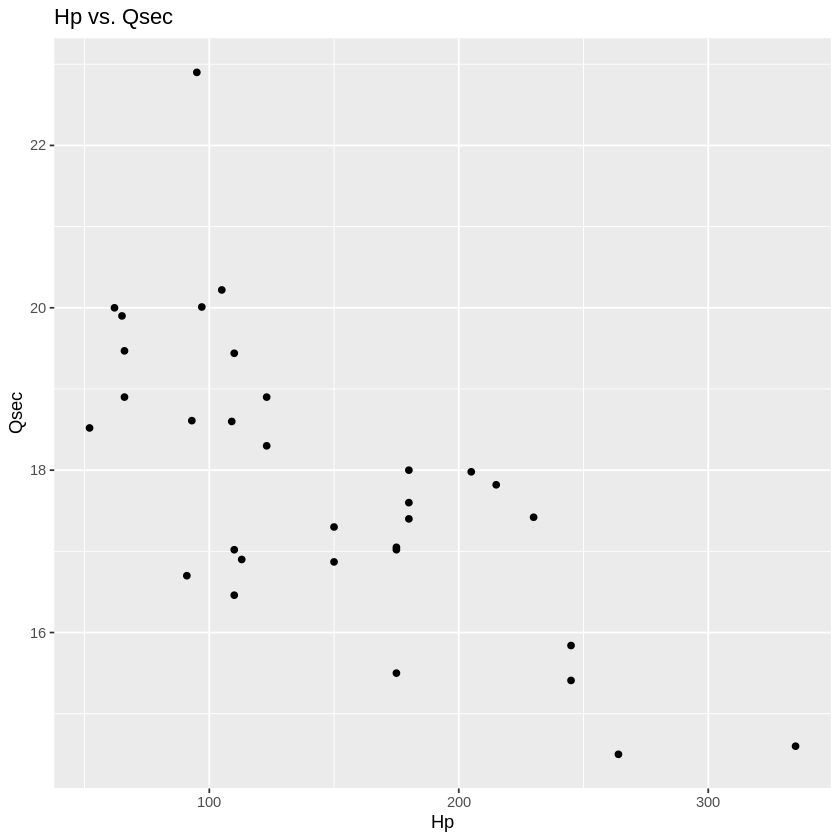

In [116]:
carPlot2 = ggplot(data = carData, aes(x = hp, y = qsec)) + geom_point() + labs(x = "Hp", y = "Qsec", title = "Hp vs. Qsec")
# carPlot = ggplot(data = carData, aes(x = wt, y = disp))
carPlot2